# **Classification of vehicle image angles with InceptionV3 model**




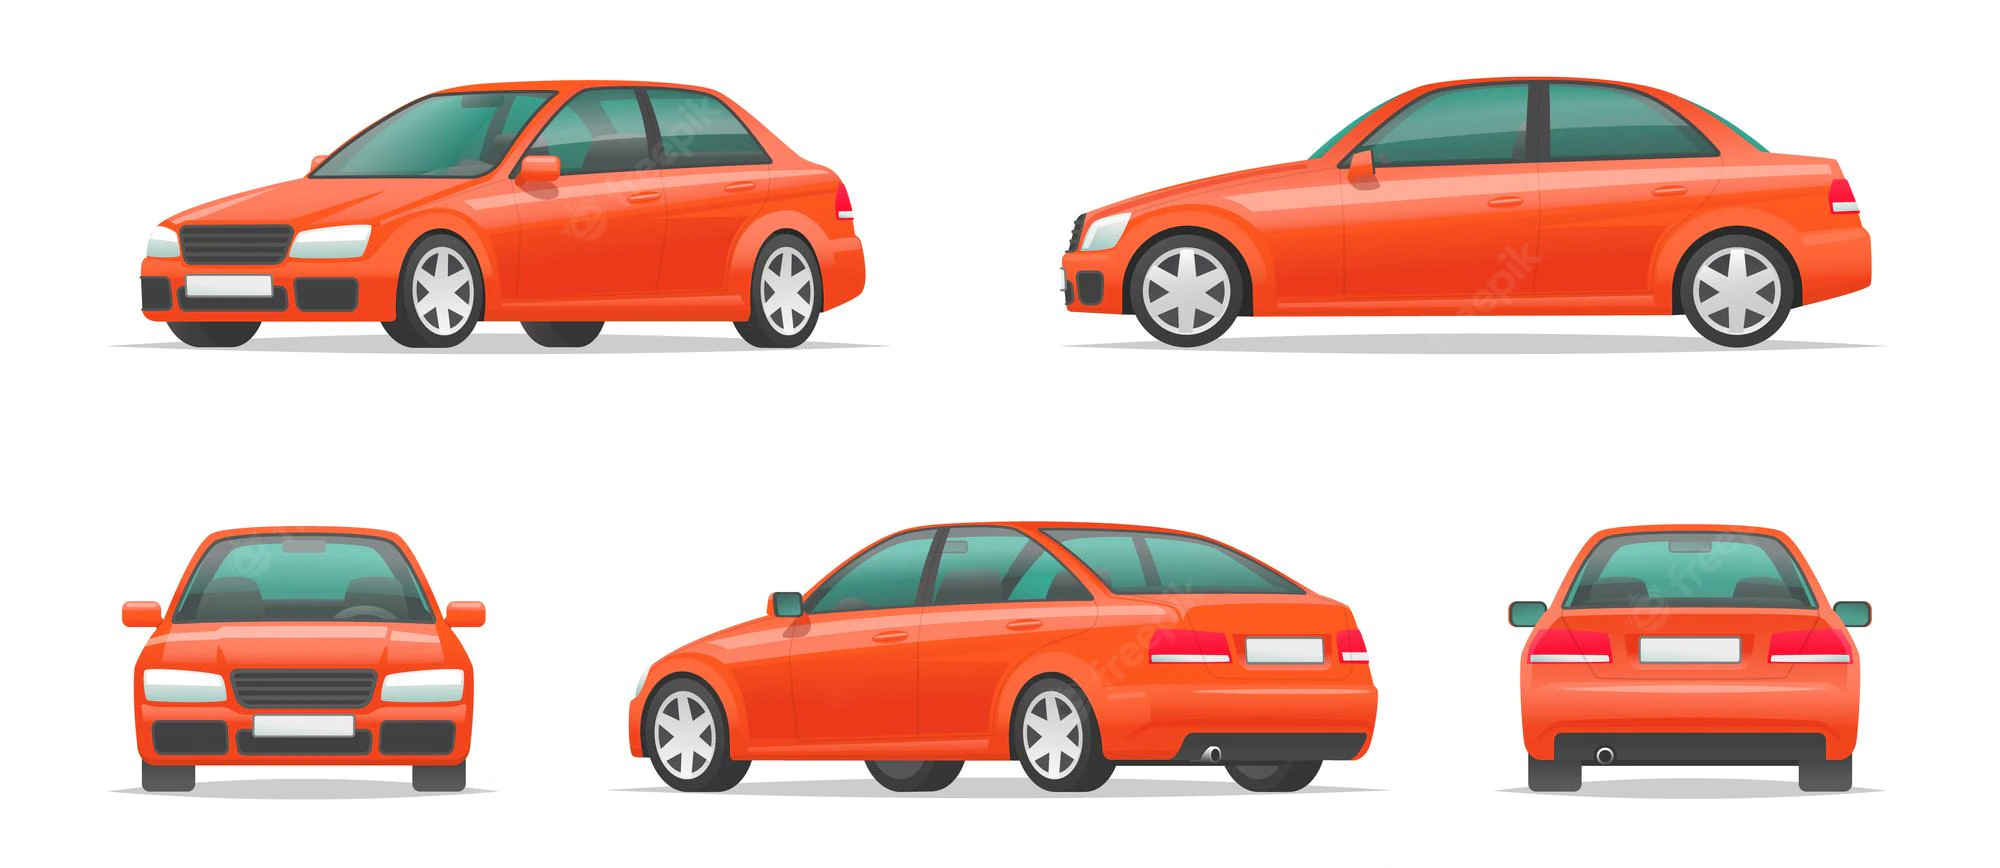

## Import Libraries

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Sequential, Model
from tensorflow.keras.activations import softmax
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
#please import any required libraries

In [ ]:
# data is in "data" folder, contains 9 classes. Please build an image classification model to classify images.

In [ ]:
import os
import shutil
import random
import itertools 
import numpy as np
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from keras.preprocessing import image
from tensorflow.keras.utils import plot_model
from mpl_toolkits.axes_grid1 import ImageGrid
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import Callback, EarlyStopping,ModelCheckpoint


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [ ]:
# download dataset
# https://drive.google.com/file/d/1yZYU2PmuYSI125QQLJNHHUnXLfFFUn2i/view?usp=sharing

## Read and Analyse the Data

In [ ]:
# data reading from unzip folder
# assig data location to root_dir
root_dir = '/content/drive/MyDrive/Sr.DS Assgn/data'

In [ ]:
folder_classes = [folder_ for _,folder_, _ in os.walk(root_dir) \
                  if len(folder_) !=0][0]
print(f"Number of Total Classes:: {len(folder_classes)} \n")
print('*'*20)
print(f"\n Classes Names {folder_classes}")

Number of Total Classes:: 9 

********************

 Classes Names ['driver_side', 'front', 'passenger_side', 'rear', '3_4th_driver_side_rear', '3_4th_passenger_side_front', '3_4th_passenger_side_rear', 'unknown', '3_4th_driver_side_front']


In [ ]:
# counting images in each folder
# folder names with counts storing in dictionary
results = {}
folder_classes_images = {}
for fol in folder_classes:
  count = 0
  sub_images = []
  for img_ in os.listdir(os.path.join(root_dir, fol)):
    sub_images.append(os.path.join(root_dir, fol,img_))
    count +=1
  results[fol] = count
  folder_classes_images[fol] = sub_images

In [ ]:
results

{'driver_side': 500,
 'front': 500,
 'passenger_side': 500,
 'rear': 500,
 '3_4th_driver_side_rear': 500,
 '3_4th_passenger_side_front': 500,
 '3_4th_passenger_side_rear': 500,
 'unknown': 500,
 '3_4th_driver_side_front': 500}

In [ ]:
folder_classes_images['front'][:10]

['/content/drive/MyDrive/Sr.DS Assgn/data/front/148958.jpg',
 '/content/drive/MyDrive/Sr.DS Assgn/data/front/83166.jpg',
 '/content/drive/MyDrive/Sr.DS Assgn/data/front/53663.jpg',
 '/content/drive/MyDrive/Sr.DS Assgn/data/front/85284.jpg',
 '/content/drive/MyDrive/Sr.DS Assgn/data/front/55690.jpg',
 '/content/drive/MyDrive/Sr.DS Assgn/data/front/87179.jpg',
 '/content/drive/MyDrive/Sr.DS Assgn/data/front/45221.jpg',
 '/content/drive/MyDrive/Sr.DS Assgn/data/front/53906.jpg',
 '/content/drive/MyDrive/Sr.DS Assgn/data/front/35878.jpg',
 '/content/drive/MyDrive/Sr.DS Assgn/data/front/126067.jpg']

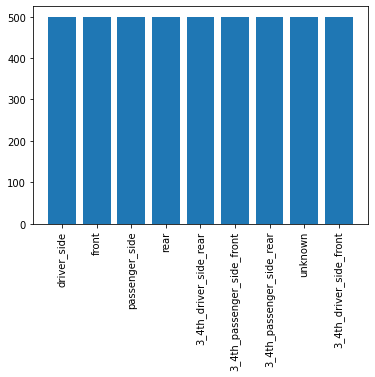

In [ ]:
# bar chart for Images count in each folder
plt.bar(*zip(*results.items()))
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Observation; Evry folder has equal no. of Images

In [ ]:
# visulize the Images

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  from ipykernel import kernelapp as app


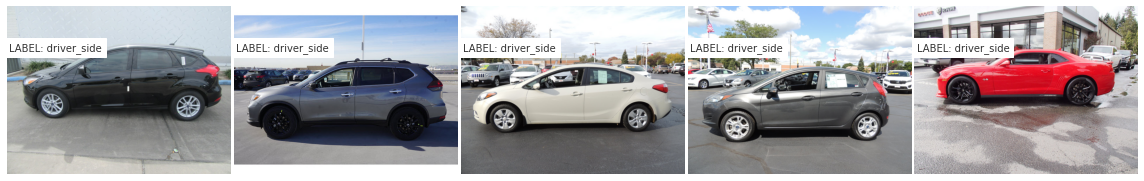

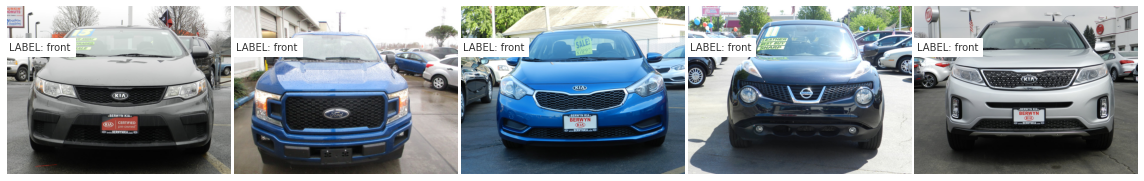

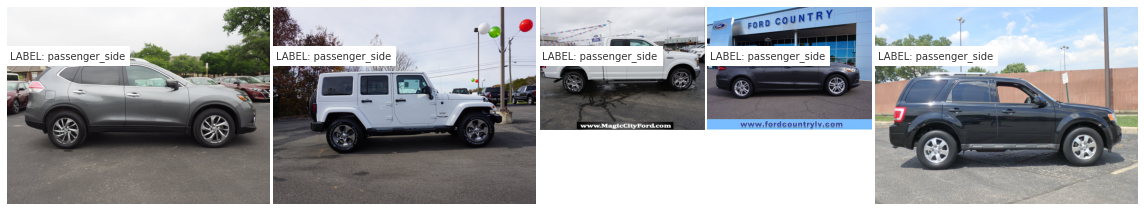

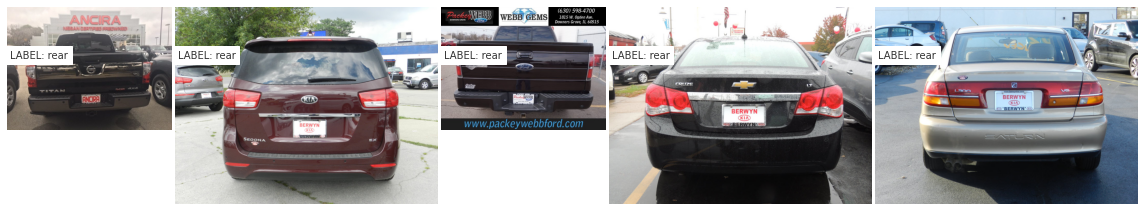

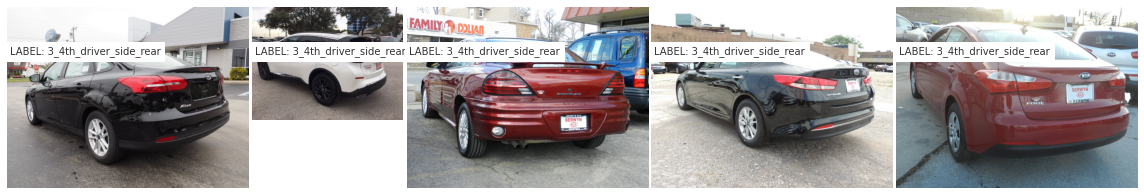

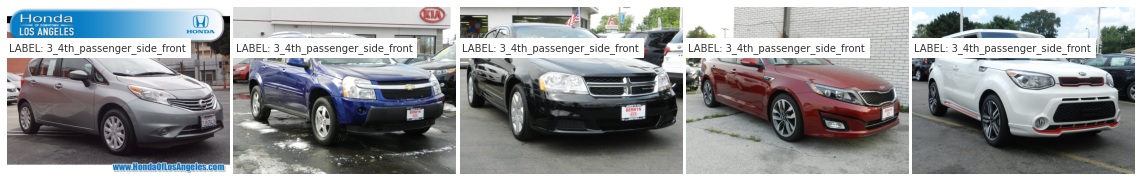

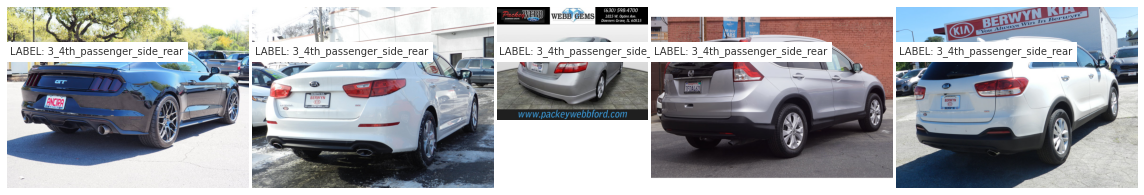

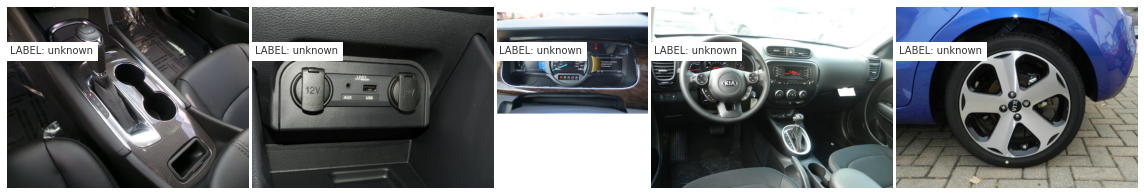

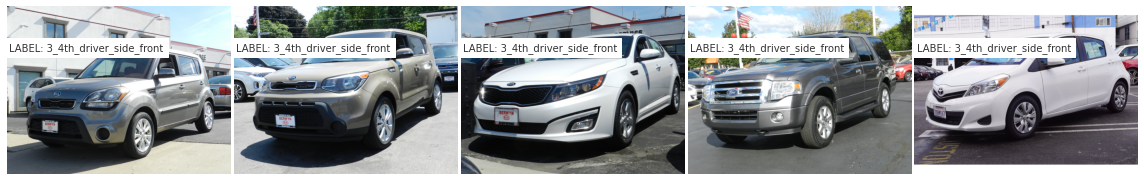

In [ ]:
# Sample 5 Images in each folder, to get basic Idea about images 
for folder_name in folder_classes:
  fig = plt.figure(1, figsize=(16, 16))
  grid = ImageGrid(fig, 111, nrows_ncols=(1, 5), axes_pad=0.05)

  for i, img_id in enumerate(random.sample(folder_classes_images[folder_name], \
                                           5)):
    ax = grid[i]
    img = image.load_img(img_id, (224, 224))
    img = image.img_to_array(img)
    ax.imshow(img / 255.)
    ax.text(10, 200, 'LABEL: %s' % folder_name, color='k', backgroundcolor='w',\
            alpha=0.8)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

In [ ]:
# checking image shape in front folder

In [ ]:
for img in folder_classes_images['front'][:10]:
  im = Image.open(img)
  width, height = im.size
  print(f"Width::{width}, Height:{height}")

Width::640, Height:480
Width::640, Height:480
Width::1024, Height:768
Width::640, Height:480
Width::1024, Height:768
Width::1024, Height:768
Width::1024, Height:768
Width::1024, Height:768
Width::1024, Height:768
Width::1024, Height:768


In [ ]:
# checking image shape in 3_4th_driver_side_front folder

In [ ]:
for img in folder_classes_images['3_4th_driver_side_front'][:10]:
  im = Image.open(img)
  width, height = im.size
  print(f"Width::{width}, Height:{height}")

Width::1024, Height:768
Width::1024, Height:768
Width::640, Height:480
Width::1024, Height:768
Width::1024, Height:768
Width::1024, Height:768
Width::1024, Height:768
Width::1024, Height:768
Width::640, Height:480
Width::1024, Height:768


In [ ]:
# Observation; Each image in folder has different shapes, We need to uniform the images

## Splitting Data

In [ ]:
## Split data 80% training, 10% Validation, 10% testing

In [ ]:
# creating 3 sub-folders in directory
# spliting images in 80:10:10 ratio for Train,val and Test

In [ ]:
rootdir= '/content/drive/MyDrive/Sr.DS Assgn/data' #path of the original folder

classes = folder_classes

for i in classes:
  os.makedirs(rootdir +'/train/' + i)
  os.makedirs(rootdir +'/val/' + i)
  os.makedirs(rootdir +'/test/' + i)

  source = rootdir + '/' + i

  allFileNames = os.listdir(source)

  np.random.shuffle(allFileNames)

  test_ratio = 0.10
  val_ratio = 0.10

  train_FileNames, val_FileNames, test_FileNames = \
  np.split(np.array(allFileNames),\
           [int(len(allFileNames)* (1 - (val_ratio + test_ratio))),\
            int(len(allFileNames)* (1 - test_ratio))])

  train_FileNames = [source+'/'+ name for name in train_FileNames.tolist()]
  val_FileNames = [source+'/' + name for name in val_FileNames.tolist()]
  test_FileNames = [source+'/' + name for name in test_FileNames.tolist()]

  for name in train_FileNames:
    shutil.copy(name, rootdir +'/train/' + i)

  for name in val_FileNames:
    shutil.copy(name, rootdir +'/val/' + i)

  for name in test_FileNames:
    shutil.copy(name, rootdir +'/test/' + i)

print('Total images: ', len(allFileNames))
print('Training: ', len(train_FileNames))
print('Validation: ', len(val_FileNames))
print('Testing: ', len(test_FileNames))

Total images:  500
Training:  400
Validation:  50
Testing:  50


In [ ]:
# verifying the counts in val, test folder

In [ ]:
len(os.listdir('/content/drive/MyDrive/Sr.DS Assgn/data/val/front'))

50

In [ ]:
len(os.listdir('/content/drive/MyDrive/Sr.DS Assgn/data/train/rear'))

400

In [ ]:
train_directory = '/content/drive/MyDrive/Sr.DS Assgn/data/train'
val_directory = '/content/drive/MyDrive/Sr.DS Assgn/data/val'
test_directory = '/content/drive/MyDrive/Sr.DS Assgn/data/test'

## Define Generator

In [ ]:
data_gen  = ImageDataGenerator(rescale=1 / 255.0)

In [ ]:
train_generator = data_gen.flow_from_directory(
    directory = train_directory,
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    subset='training',
    shuffle=True,
    seed=42
)

Found 3600 images belonging to 9 classes.


In [ ]:
val_generator = data_gen.flow_from_directory(
    directory = val_directory,
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    # subset='validation',
    shuffle=True,
    seed=42
)

Found 450 images belonging to 9 classes.


In [ ]:
test_generator = data_gen.flow_from_directory(
    directory = test_directory,
    target_size=(256, 256),
    color_mode="rgb",
    class_mode=None,
    shuffle=False,
    seed=42
)

Found 450 images belonging to 9 classes.


## Define Model

In [ ]:
pre_trained_model = InceptionV3(
    input_shape = (256, 256, 3),
    include_top = False,
    weights = 'imagenet'
)

87924736/87910968 [==============================] - 0s 0us/step


In [ ]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [ ]:
# Fine tuning the model

In [ ]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(pre_trained_model.output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense(9, activation='softmax')(x)           

model = Model(pre_trained_model.input, x) 

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

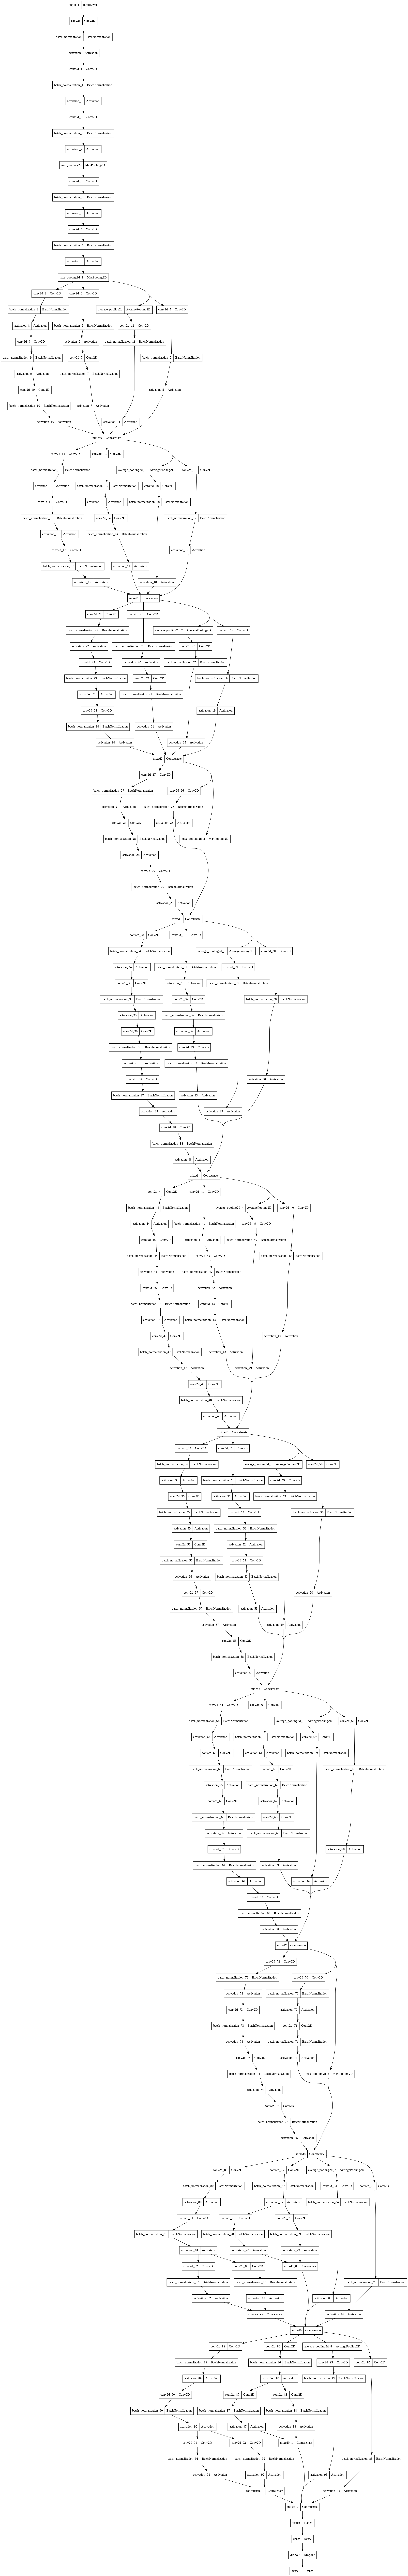

In [ ]:
plot_model(model)

## Compiling Model

In [ ]:
model.compile(optimizer = Adam(lr=0.001), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Create checkpoint callback
checkpoint_path = "vechile_angle_classification_model_checkpoint"
checkpoint_callback = ModelCheckpoint(checkpoint_path,
                                      save_weights_only=True,
                                      monitor="val_accuracy",
                                      save_best_only=True)

In [ ]:
early_stopping = EarlyStopping(monitor = "val_loss", # watch the val loss metric
                               patience = 5,
                               restore_best_weights = True)

In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=val_generator.n//val_generator.batch_size
history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=val_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10,
                    callbacks=[checkpoint_callback,
                               early_stopping]
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
112/112 [==============================] - 72s 507ms/step - loss: 10.8218 - accuracy: 0.7856 - val_loss: 0.1716 - val_accuracy: 0.9665
Epoch 2/10
112/112 [==============================] - 53s 472ms/step - loss: 0.2688 - accuracy: 0.9647 - val_loss: 0.2360 - val_accuracy: 0.9598
Epoch 3/10
112/112 [==============================] - 54s 479ms/step - loss: 0.0809 - accuracy: 0.9815 - val_loss: 0.0642 - val_accuracy: 0.9732
Epoch 4/10
112/112 [==============================] - 55s 487ms/step - loss: 0.0575 - accuracy: 0.9857 - val_loss: 0.1205 - val_accuracy: 0.9732
Epoch 5/10
112/112 [==============================] - 56s 496ms/step - loss: 0.0681 - accuracy: 0.9860 - val_loss: 0.0687 - val_accuracy: 0.9821
Epoch 6/10
112/112 [==============================] - 57s 514ms/step - loss: 0.0578 - accuracy: 0.9885 - val_loss: 0.0451 - val_accuracy: 0.9933
Epoch 7/10
112/112 [==============================] - 54s 478ms/step - loss: 0.0458 - accuracy: 0.9891 - val_loss: 0.0382 - val_a

## Training

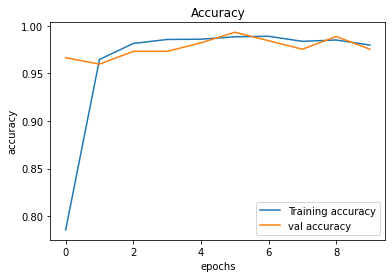

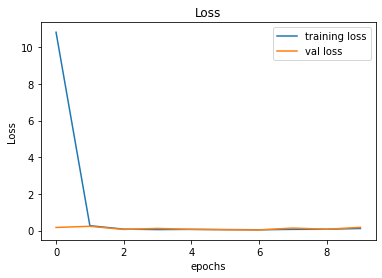

In [ ]:
plt.figure(0)
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="val accuracy")
plt.title("Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.figure(1)
plt.plot(history.history['loss'], label="training loss")
plt.plot(history.history['val_loss'], label="val loss")
plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Testing

In [ ]:
test_test_generator = data_gen.flow_from_directory(
    directory = test_directory,
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    shuffle=True,
    seed=42
)
results = model.evaluate(test_test_generator, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

Found 450 images belonging to 9 classes.
    Test Loss: 0.16446
Test Accuracy: 98.22%


In [ ]:
# Reset 
test_test_generator.reset()

# Evaluate on Test data
scores = model.evaluate(test_test_generator)
print("%s%s: %.2f%%" % ("evaluate ",model.metrics_names[1], scores[1]*100))

15/15 [==============================] - 6s 393ms/step - loss: 0.1645 - accuracy: 0.9822
evaluate accuracy: 98.22%


In [ ]:
#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(20,20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            cm = np.around(cm, decimals=2)
            cm[np.isnan(cm)] = 0.0
            print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


target_names = []
for key in train_generator.class_indices:
    target_names.append(key)
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


Confusion Matrix
Normalized confusion matrix


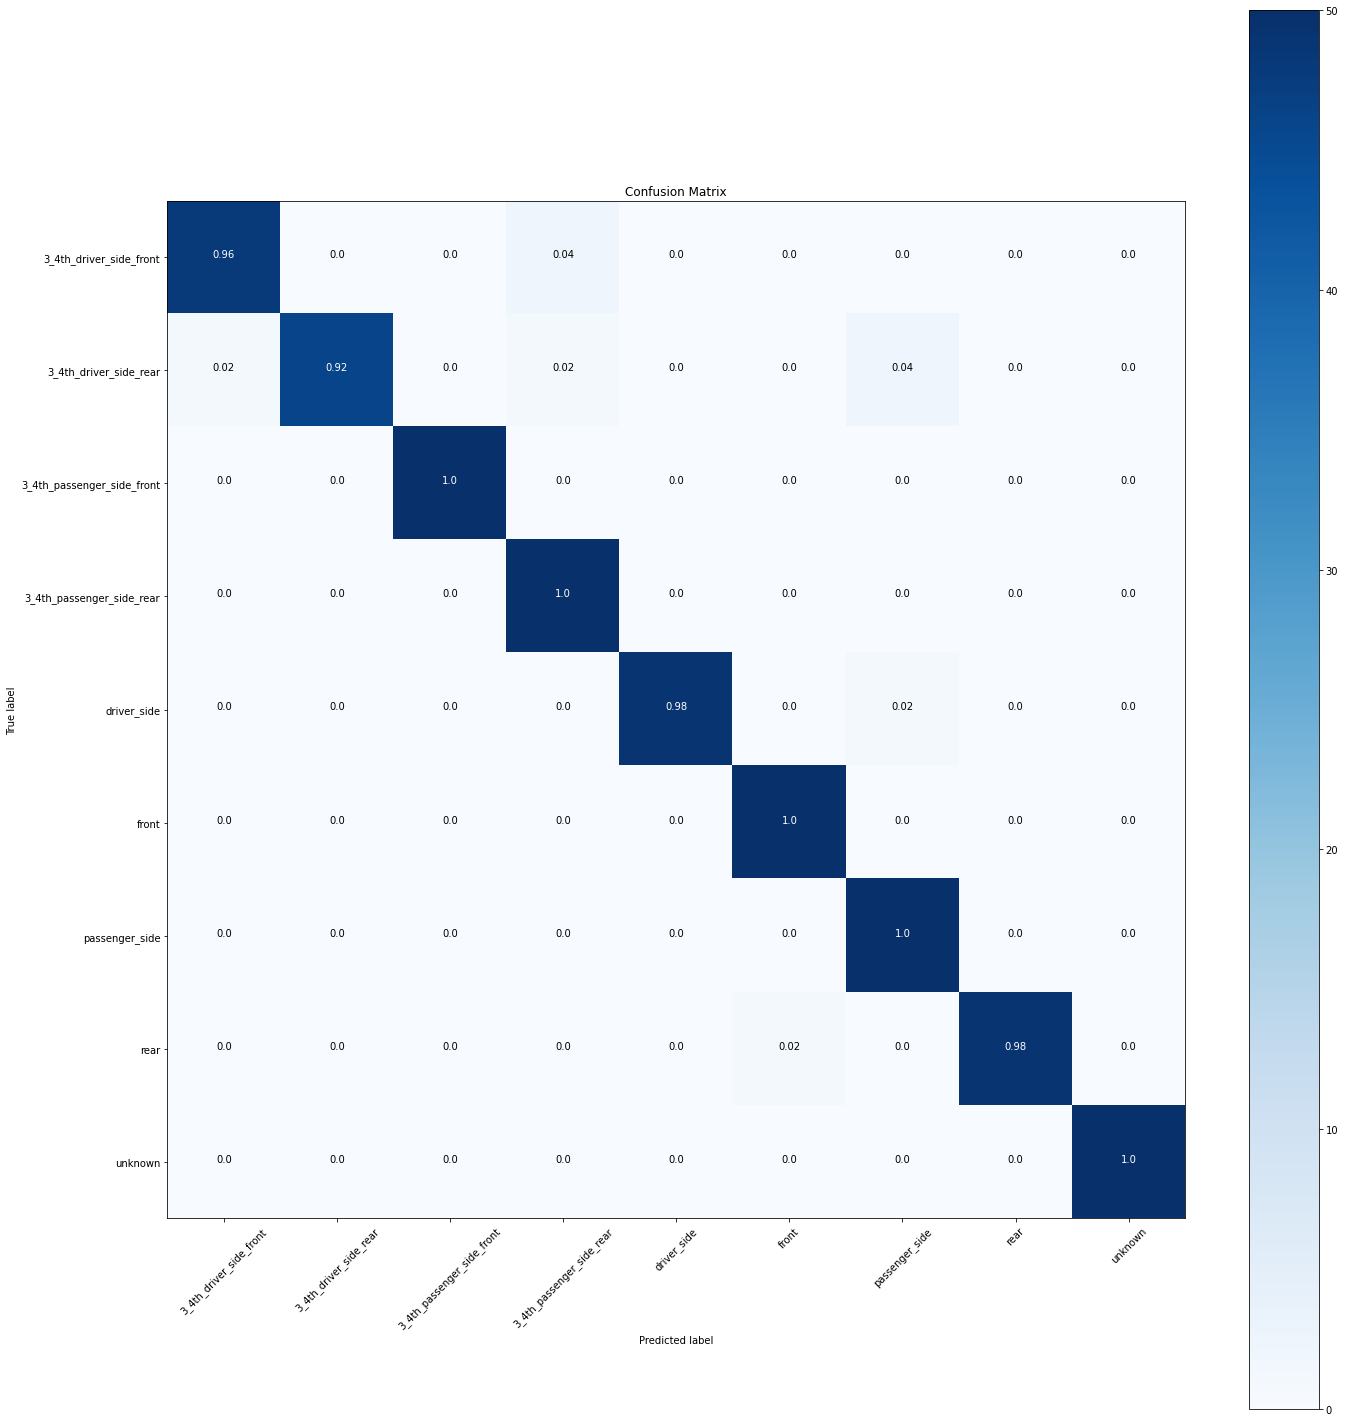

In [ ]:
#Confution Matrix
print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')


In [ ]:
#Print Classification Report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Classification Report
                            precision    recall  f1-score   support

   3_4th_driver_side_front       0.98      0.96      0.97        50
    3_4th_driver_side_rear       1.00      0.92      0.96        50
3_4th_passenger_side_front       1.00      1.00      1.00        50
 3_4th_passenger_side_rear       0.94      1.00      0.97        50
               driver_side       1.00      0.98      0.99        50
                     front       0.98      1.00      0.99        50
            passenger_side       0.94      1.00      0.97        50
                      rear       1.00      0.98      0.99        50
                   unknown       1.00      1.00      1.00        50

                  accuracy                           0.98       450
                 macro avg       0.98      0.98      0.98       450
              weighted avg       0.98      0.98      0.98       450



## Improving Model



*   Hyperparameter Tuning
*   Optimization of model
*   Distill Version of Model
*   More Image Augmentation Techniques(horizontal_flip, zoom_range)


